In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
import matplotlib.pyplot as plt
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
'''
    Some hyperparameters
'''
max_features = 10000
max_len = 500
batch_size = 32

In [3]:
'''
    Very good piece of code to load and pre-process text data
'''
print('....Loading Data')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


....Loading Data
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
'''
    A simple RNN using embedding layer and a SimpleRNN layer. 32 is the number of dimensions we wish to 
    embed into. Like 8 in the previous example we did for word embeddings.
'''
model = Sequential()
model.add(Embedding(max_features, 4))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\Vishaal\Anaconda3_Mod\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.6239 - acc: 0.6696 - val_loss: 0.4776 - val_acc: 0.7720
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.4138 - acc: 0.8328 - val_loss: 0.4605 - val_acc: 0.7802
Epoch 3/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3200 - acc: 0.8737 - val_loss: 0.3594 - val_acc: 0.8594
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2679 - acc: 0.8974 - val_loss: 0.2825 - val_acc: 0.8860
Epoch 5/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2299 - acc: 0.9122 - val_loss: 0.7204 - val_acc: 0.7990
Epoch 6/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.2080 - acc: 0.9233 - val_loss: 0.2782 - val_acc: 0.8934
Epoch 7/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1838 - acc: 0.9316 - val_loss: 0.2783 - val_acc:

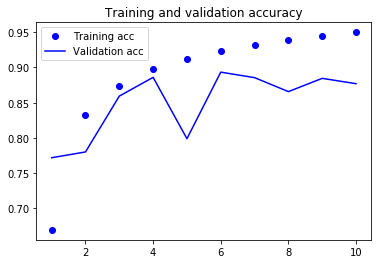

In [5]:
'''
    Plotting accuracy VS epoch for training and validations
'''
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

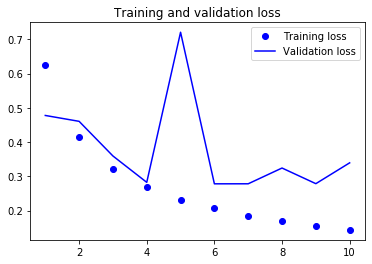

In [6]:
'''
    Plotting loss VS epoch for training and validations
'''
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [7]:
'''
    We get an accuracy of 86.4% on the validation set which is not super remarkable. Earlier we got 88% 
    without RNN. This is because we are using simple RNNs. We will explore other types of layers. 
'''
max(history.history['val_acc'])

0.8934000134468079